In [1]:
#%tensorflow_version 1.x

TensorFlow 1.x selected.


In [1]:
!gdown --id 155wulmctFNkAMYFp770XLCWm1FcYEsfy

/home/damian/.local/lib/python3.8/site-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=155wulmctFNkAMYFp770XLCWm1FcYEsfy
To: /home/damian/Pulpit/licencjat/program2/word_seg/WordSegData2.zip
100%|██████████████████████████████████████| 10.5M/10.5M [00:04<00:00, 2.17MB/s]


In [2]:
!mkdir content
!unzip WordSegData2 -d content/

Archive:  WordSegData2.zip
   creating: content/Dataset1/
   creating: content/Dataset1/img/
  inflating: content/Dataset1/img/lineA0.jpg  
  inflating: content/Dataset1/img/lineA1.jpg  
  inflating: content/Dataset1/img/lineA10.jpg  
  inflating: content/Dataset1/img/lineA11.jpg  
  inflating: content/Dataset1/img/lineA12.jpg  
  inflating: content/Dataset1/img/lineA13.jpg  
  inflating: content/Dataset1/img/lineA14.jpg  
  inflating: content/Dataset1/img/lineA15.jpg  
  inflating: content/Dataset1/img/lineA16.jpg  
  inflating: content/Dataset1/img/lineA17.jpg  
  inflating: content/Dataset1/img/lineA18.jpg  
  inflating: content/Dataset1/img/lineA19.jpg  
  inflating: content/Dataset1/img/lineA2.jpg  
  inflating: content/Dataset1/img/lineA20.jpg  
  inflating: content/Dataset1/img/lineA21.jpg  
  inflating: content/Dataset1/img/lineA22.jpg  
  inflating: content/Dataset1/img/lineA23.jpg  
  inflating: content/Dataset1/img/lineA24.jpg  
  inflating: content/Dataset1/img/lineA25.jpg 

  inflating: content/Dataset1/img/linebh21.jpg  
  inflating: content/Dataset1/img/linebh22.jpg  
  inflating: content/Dataset1/img/linebh23.jpg  
  inflating: content/Dataset1/img/linebh24.jpg  
  inflating: content/Dataset1/img/linebh25.jpg  
  inflating: content/Dataset1/img/linebh26.jpg  
  inflating: content/Dataset1/img/linebh27.jpg  
  inflating: content/Dataset1/img/linebh3.jpg  
  inflating: content/Dataset1/img/linebh4.jpg  
  inflating: content/Dataset1/img/linebh5.jpg  
  inflating: content/Dataset1/img/linebh6.jpg  
  inflating: content/Dataset1/img/linebh7.jpg  
  inflating: content/Dataset1/img/linebh8.jpg  
  inflating: content/Dataset1/img/linebh9.jpg  
  inflating: content/Dataset1/img/linebi0.jpg  
  inflating: content/Dataset1/img/linebi1.jpg  
  inflating: content/Dataset1/img/linebi10.jpg  
  inflating: content/Dataset1/img/linebi11.jpg  
  inflating: content/Dataset1/img/linebi12.jpg  
  inflating: content/Dataset1/img/linebi13.jpg  
  inflating: content/Dataset1

  inflating: content/Dataset1/mask/lineak25_mask.png  
  inflating: content/Dataset1/mask/lineak26_mask.png  
  inflating: content/Dataset1/mask/lineak29_mask.png  
  inflating: content/Dataset1/mask/lineak2_mask.png  
  inflating: content/Dataset1/mask/lineak30_mask.png  
  inflating: content/Dataset1/mask/lineak31_mask.png  
  inflating: content/Dataset1/mask/lineak32_mask.png  
  inflating: content/Dataset1/mask/lineak33_mask.png  
  inflating: content/Dataset1/mask/lineak34_mask.png  
  inflating: content/Dataset1/mask/lineak35_mask.png  
  inflating: content/Dataset1/mask/lineak3_mask.png  
  inflating: content/Dataset1/mask/lineak5_mask.png  
  inflating: content/Dataset1/mask/lineak6_mask.png  
  inflating: content/Dataset1/mask/lineak7_mask.png  
  inflating: content/Dataset1/mask/lineak8_mask.png  
  inflating: content/Dataset1/mask/lineak9_mask.png  
  inflating: content/Dataset1/mask/lineal0_mask.png  
  inflating: content/Dataset1/mask/lineal11_mask.png  
  inflating: conte

In [5]:
#Importing required libraries.
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
#from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Conv2DTranspose,Input,Add,UpSampling2D,Dropout,concatenate
from keras.layers import *
from keras.models import Model
from tensorflow.keras.optimizers import Adam
import random
import math

image_list=os.listdir('content/Dataset1/img/')
image_list=[filename.split(".")[0]for filename in image_list]

def visualize(img,seg_img):
    """
    Visualizes image
    """
    plt.figure(figsize=(20,20))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title('Image')
    plt.subplot(1,2,2)
    plt.imshow(seg_img,cmap='gray')
    plt.title('Segmented Image')
    plt.show()

def roundup(x):
    return int(math.ceil(x / 10.0)) * 10
    
def get_segmented_img(img,n_classes):
    """
    Loads in the segmented image and create suitable segmentation label.
    """
    seg_labels=np.zeros((512,512,1))
    img=cv2.resize(img,(512,512))
    img=img[:,:,0]
    cl_list=[0,24]

    
    seg_labels[:,:,0]=(img!=0).astype(int)


    return seg_labels
def pad_img(img):
	old_h,old_w=img.shape[0],img.shape[1]

	#Pad the height.

	#If height is less than 512 then pad to 512
	if old_h<512:
		to_pad=np.ones((512-old_h,old_w))*255
		img=np.concatenate((img,to_pad))
		new_height=512
	else:
	#If height >512 then pad to nearest 10.
		to_pad=np.ones((roundup(old_h)-old_h,old_w))*255
		img=np.concatenate((img,to_pad))
		new_height=roundup(old_h)

	#Pad the width.
	if old_w<512:
		to_pad=np.ones((new_height,512-old_w))*255
		img=np.concatenate((img,to_pad),axis=1)
		new_width=512
	else:
		to_pad=np.ones((new_height,roundup(old_w)-old_w))*255
		img=np.concatenate((img,to_pad),axis=1)
		new_width=roundup(old_w)-old_w
	return img


def pad_seg(img):
	old_h,old_w=img.shape[0],img.shape[1]

	#Pad the height.

	#If height is less than 512 then pad to 512
	if old_h<512:
		to_pad=np.zeros((512-old_h,old_w))
		img=np.concatenate((img,to_pad))
		new_height=512
	else:
	#If height >512 then pad to nearest 10.
		to_pad=np.zeros((roundup(old_h)-old_h,old_w))
		img=np.concatenate((img,to_pad))
		new_height=roundup(old_h)

	#Pad the width.
	if old_w<512:
		to_pad=np.zeros((new_height,512-old_w))
		img=np.concatenate((img,to_pad),axis=1)
		new_width=512
	else:
		to_pad=np.zeros((new_height,roundup(old_w)-old_w))
		img=np.concatenate((img,to_pad),axis=1)
		new_width=roundup(old_w)-old_w
	return img



def batch_generator(filelist,n_classes,batch_size):
  while True:
    X=[]
    Y=[]
    for i in range(batch_size):
      fn=random.choice(filelist)
      img=cv2.imread(f'content/Dataset1/img/{fn}.jpg',0)
      img=pad_img(img)
      ret,img=cv2.threshold(img,150,255,cv2.THRESH_BINARY_INV)
      

      img=cv2.resize(img,(512,512))
      img=np.expand_dims(img,axis=-1)
      #img = np.stack((img,)*3, axis=-1)
      img=img/255

      seg=cv2.imread(f'content/Dataset1/mask/{fn}_mask.png',0)
      seg=pad_seg(seg)
      seg=cv2.resize(seg,(512,512))
      seg = np.stack((seg,)*3, axis=-1)
      seg=get_segmented_img(seg,n_classes)

      X.append(img)
      Y.append(seg)
    yield np.array(X),np.array(Y)


    




In [6]:
random.shuffle(image_list)
file_train=image_list[0:int(0.75*len(image_list))]
file_test=image_list[int(0.75*len(image_list)):]



In [7]:
def unet(pretrained_weights = None,input_size = (512,512,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs,conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

model=unet()
model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 512, 512, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

2022-04-09 22:04:29.026670: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 22:04:29.032999: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 22:04:29.033228: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 22:04:29.034051: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

                                                                                                  
 conv2d_3 (Conv2D)              (None, 256, 256, 12  147584      ['conv2d_2[0][0]']               
                                8)                                                                
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 128, 128, 12  0          ['conv2d_3[0][0]']               
                                8)                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 128, 128, 25  295168      ['max_pooling2d_1[0][0]']        
                                6)                                                                
                                                                                                  
 conv2d_5 

 conv2d_20 (Conv2D)             (None, 512, 512, 64  73792       ['concatenate_3[0][0]']          
                                )                                                                 
                                                                                                  
 conv2d_21 (Conv2D)             (None, 512, 512, 64  36928       ['conv2d_20[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_22 (Conv2D)             (None, 512, 512, 2)  1154        ['conv2d_21[0][0]']              
                                                                                                  
 conv2d_23 (Conv2D)             (None, 512, 512, 1)  3           ['conv2d_22[0][0]']              
                                                                                                  
Total para

In [8]:
image_list[0]

'lineI14'

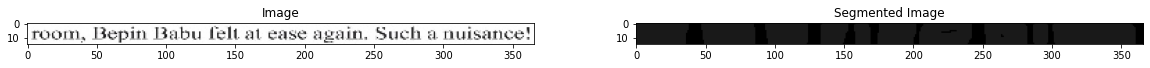

In [10]:
img=cv2.imread('content/Dataset1/img/'+image_list[0]+'.jpg',1)
seg=cv2.imread('content/Dataset1/mask/'+image_list[0]+'_mask.png',1)

visualize(img,seg)


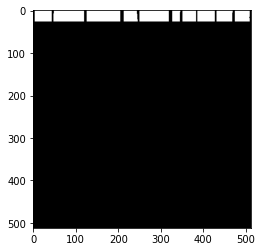

In [11]:
img,seg=next(batch_generator(file_test,2,1))
plt.imshow(np.squeeze(seg[:,:,:,0],axis=0),cmap='gray')


In [12]:
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('weights{epoch:08d}.h5', 
                                     save_weights_only=True, period=1)
model.fit_generator(batch_generator(file_train,2,2),epochs=5,steps_per_epoch=1000,validation_data=batch_generator(file_test,2,2),
                    validation_steps=400,callbacks=[mc],shuffle=1)


Epoch 1/5


/tmp/ipykernel_46013/531898499.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(batch_generator(file_train,2,2),epochs=5,steps_per_epoch=1000,validation_data=batch_generator(file_test,2,2),
2022-04-09 22:04:46.228100: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8400
2022-04-09 22:04:47.097209: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2022-04-09 22:04:47.099236: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.6
2022-04-09 22:04:47.099274: W tensorflow/stream_executor/gpu/asm

1000/1000 [==============================] - 412s 404ms/step - loss: 0.6549 - accuracy: 0.9965 - val_loss: 0.6308 - val_accuracy: 0.9970
Epoch 2/5
1000/1000 [==============================] - 401s 402ms/step - loss: 0.6088 - accuracy: 0.9975 - val_loss: 0.5868 - val_accuracy: 0.9972
Epoch 3/5
1000/1000 [==============================] - 400s 400ms/step - loss: 0.5664 - accuracy: 0.9976 - val_loss: 0.5459 - val_accuracy: 0.9973
Epoch 4/5
1000/1000 [==============================] - 401s 401ms/step - loss: 0.5267 - accuracy: 0.9978 - val_loss: 0.5069 - val_accuracy: 0.9974
Epoch 5/5
1000/1000 [==============================] - 410s 410ms/step - loss: 0.4889 - accuracy: 0.9978 - val_loss: 0.4717 - val_accuracy: 0.9974


In [ ]:
#model.save("word_seg_model.h5")

In [13]:
file_test='content/Dataset1/img/lineA1.jpg'
img=cv2.imread(f'{file_test}',0)
img=pad_img(img)
ret,img=cv2.threshold(img,150,255,cv2.THRESH_BINARY_INV)
img=cv2.resize(img,(512,512))
img=np.expand_dims(img,axis=-1)
#img = np.stack((img,)*3, axis=-1)
img=img/255




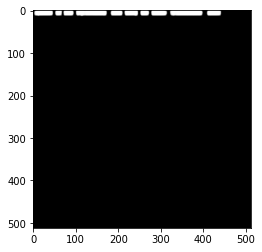

In [14]:
img=np.expand_dims(img,axis=0)
pred=model.predict(img)
pred=np.squeeze(np.squeeze(pred,axis=0),axis=-1)
plt.imshow(pred,cmap='gray')

In [15]:
plt.imsave('test_img_mask.JPG',pred)

In [16]:
coordinates=[]

In [17]:
import cv2
img = cv2.imread('content/test_img_mask.JPG',0) 
cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU,img)
ori_img=cv2.imread(f'{file_test}',0)
ori_img=pad_img(ori_img)
(H, W) = ori_img.shape[:2]
(newW, newH) = (512, 512)
rW = W / float(newW)
rH = H / float(newH)
ori_img_copy=np.stack((ori_img,)*3, axis=-1)

contours, hier = cv2.findContours(img, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    # draw a white rectangle to visualize the bounding rect
    cv2.rectangle(ori_img_copy, (int(x*rW), int(y*rH)), (int((x+w)*rW),int((y+h)*rH)), (255,0,0), 1)
    #coordinates.append([x,y,(x+w),(y+h)])

#cv2.drawContours(img, contours, -1, (255, 255, 0), 1)

cv2.imwrite("output.png",ori_img_copy)

[ WARN:0@2215.149] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('content/test_img_mask.JPG'): can't open/read file: check file path/integrity


True

In [18]:
#from google.colab import drive
#drive.mount('content/gdrive/')